In [1]:
import torch
import torch.nn as nn
from torch import optim
import warnings
import random
import numpy as np
from matplotlib import pyplot as plt


warnings.filterwarnings("ignore")

In [2]:
def generate_x(N):
    X=np.random.randint(0, 9, size=N, dtype=int)
    X=list(X)
    return X

In [3]:
def generate_y(X):
    Y=[X[0]]
    for x in X[1:]:
        y=x+X[0]
        if y>=10:
            y=y-10
        Y.append(y)
    return Y

In [77]:
def generate_data(N):
    X=generate_x(N)
    Y=generate_y(X)
    X_train=torch.tensor(X, dtype=torch.long).view(N,1)
    Y_train=torch.tensor(Y, dtype=torch.long).view(N,1)
    return X_train, Y_train

In [74]:
# Строим класс RNN
class RNNmodel(torch.nn.Module):
                        # тип     размер словаря  размер эмб       скрытые слои   классы
    def __init__(self, dictionary_size, embedding_size, num_hiddens, output_size):
        super().__init__()
        self.num_hiddens = num_hiddens
        self.embedding = nn.Embedding(dictionary_size, embedding_size)
        self.hidden = nn.RNN(embedding_size, num_hiddens, batch_first=True)
        self.fc = nn.Linear(num_hiddens, output_size)
        


    def forward(self, X):
        out = self.embedding(X)
        out, state = self.hidden(out)
        predictions = self.fc(out)
        return predictions

In [75]:
#строим класс LSTM
class LSTMmodel(torch.nn.Module):
                        # тип     размер словаря  размер эмб       скрытые слои   классы
    def __init__(self, dictionary_size, embedding_size, num_hiddens, output_size):
        super().__init__()
        self.num_hiddens = num_hiddens
        self.embedding = nn.Embedding(dictionary_size, embedding_size)
        self.hidden = nn.LSTM(embedding_size, num_hiddens, batch_first=True)
        self.fc = nn.Linear(num_hiddens, output_size)
        

    def forward(self, X):
        out = self.embedding(X)
        out, state = self.hidden(out)
        predictions = self.fc(out)
        return predictions

In [76]:
#строим класс GRU
class GRUmodel(torch.nn.Module):
                        # тип     размер словаря  размер эмб       скрытые слои   классы
    def __init__(self, dictionary_size, embedding_size, num_hiddens, output_size):
        super().__init__()
        self.num_hiddens = num_hiddens
        self.embedding = nn.Embedding(dictionary_size, embedding_size)
        self.hidden = nn.GRU(embedding_size, num_hiddens, batch_first=True)
        self.fc = nn.Linear(num_hiddens, output_size)
        

    def forward(self, X):
        out = self.embedding(X)
        out, state = self.hidden(out)  # в state приходят все h-выходы и последний cell выход (между LSTM  и GRU
        predictions = self.fc(out) #в LSTM state=(hidden, cell), state[0]=hidden
        return predictions

In [82]:
model_rnn=RNNmodel(dictionary_size=10, embedding_size=64, num_hiddens=128, output_size=10)
model_lstm=LSTMmodel(dictionary_size=10, embedding_size=64, num_hiddens=128, output_size=10)
model_gru=GRUmodel(dictionary_size=10, embedding_size=64, num_hiddens=128, output_size=10)

In [78]:
X_train, Y_train=generate_data(10000)

In [81]:
def train(model, X_train, Y_train,  num_epochs):

    criterion = torch.nn.CrossEntropyLoss(reduction='mean')
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

    arr_losses=[]

    for ep in range(num_epochs):
        train_loss = 0.
        train_passed = 0

        model.train()

        for i in range(int(len(X_train)/100)):
            X_batch = X_train[i*(100):(i+1)*100]
            Y_batch = Y_train[i*(100):(i+1)*100] 
            Y_batch = Y_batch.flatten()
            #print(Y_batch.shape)

            optimizer.zero_grad()
            answers = model.forward(X_batch)
            #print(answers.shape)
            answers = answers.view(-1, 10) #num_classes=10
            #print(answers.shape)
            #print(answers)
            loss = criterion(answers, Y_batch)
            train_loss += loss.item()

            loss.backward()
            optimizer.step()
            train_passed += 1


        arr_losses.append(train_loss / train_passed)
        print("Epoch {}. Train loss: {:.3f}".format(ep, train_loss / train_passed))

    return arr_losses

In [83]:
#dictionary size=10, так как 10 классов: 0-9
#предсказываем так же из 10 классов: цифру от 0 до 9
#64 - слой эмбедингов
#128 - скрытые слои
lossesRNN=train(model_rnn, X_train, Y_train, 20)

Epoch 0. Train loss: 1.859
Epoch 1. Train loss: 0.914
Epoch 2. Train loss: 0.405
Epoch 3. Train loss: 0.200
Epoch 4. Train loss: 0.115
Epoch 5. Train loss: 0.075
Epoch 6. Train loss: 0.053
Epoch 7. Train loss: 0.039
Epoch 8. Train loss: 0.031
Epoch 9. Train loss: 0.024
Epoch 10. Train loss: 0.020
Epoch 11. Train loss: 0.017
Epoch 12. Train loss: 0.014
Epoch 13. Train loss: 0.012
Epoch 14. Train loss: 0.011
Epoch 15. Train loss: 0.009
Epoch 16. Train loss: 0.008
Epoch 17. Train loss: 0.007
Epoch 18. Train loss: 0.007
Epoch 19. Train loss: 0.006


In [84]:
lossesLSTM=train(model_lstm, X_train, Y_train, 20)

Epoch 0. Train loss: 2.132
Epoch 1. Train loss: 1.647
Epoch 2. Train loss: 1.072
Epoch 3. Train loss: 0.597
Epoch 4. Train loss: 0.321
Epoch 5. Train loss: 0.184
Epoch 6. Train loss: 0.117
Epoch 7. Train loss: 0.080
Epoch 8. Train loss: 0.058
Epoch 9. Train loss: 0.044
Epoch 10. Train loss: 0.035
Epoch 11. Train loss: 0.028
Epoch 12. Train loss: 0.023
Epoch 13. Train loss: 0.019
Epoch 14. Train loss: 0.016
Epoch 15. Train loss: 0.014
Epoch 16. Train loss: 0.012
Epoch 17. Train loss: 0.011
Epoch 18. Train loss: 0.010
Epoch 19. Train loss: 0.009


In [85]:
lossesGRU=train(model_gru, X_train, Y_train, 20)

Epoch 0. Train loss: 1.926
Epoch 1. Train loss: 1.228
Epoch 2. Train loss: 0.641
Epoch 3. Train loss: 0.309
Epoch 4. Train loss: 0.164
Epoch 5. Train loss: 0.099
Epoch 6. Train loss: 0.066
Epoch 7. Train loss: 0.047
Epoch 8. Train loss: 0.035
Epoch 9. Train loss: 0.027
Epoch 10. Train loss: 0.022
Epoch 11. Train loss: 0.018
Epoch 12. Train loss: 0.015
Epoch 13. Train loss: 0.013
Epoch 14. Train loss: 0.011
Epoch 15. Train loss: 0.010
Epoch 16. Train loss: 0.008
Epoch 17. Train loss: 0.007
Epoch 18. Train loss: 0.007
Epoch 19. Train loss: 0.006


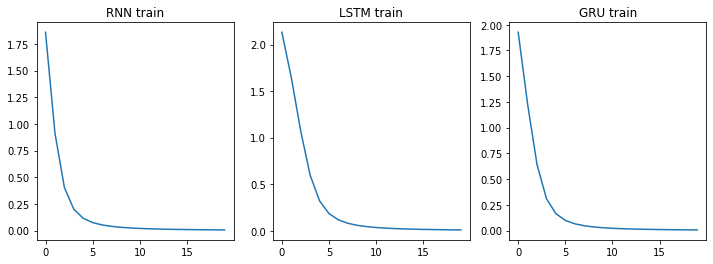

In [86]:
losses=[lossesRNN, lossesLSTM, lossesGRU]
names=['RNN train', 'LSTM train', 'GRU train']
#plt.figure(figsize=(24,6))
fig, axs = plt.subplots(1, 3, figsize=(12,4))
for i in range(3):
    axs[i].plot(losses[i])
    axs[i].set_title(names[i])

In [134]:
def eval_model(model, X_test, Y_test):
    model.eval()
    accur = 0.
    data_passed = 0

    for i in range(int(len(X_test)/100)):
        X_batch = X_test[i*(100):(i+1)*100]
        Y_batch = Y_test[i*(100):(i+1)*100] 
        Y_batch = Y_batch.flatten()
            #print(Y_batch.shape)


        answers = model.forward(X_batch)
        answers = answers.view(-1, 10) #num_classes=10
        
        accur += (torch.argmax(answers,dim=1) == Y_batch).sum().item()
        data_passed += Y_batch.shape[0]

    return accur/data_passed

In [119]:
#сгенерируем продолжение тренировочной последовательности, которую не видела модель
def generate_test_data(X_train, N):
    X_test=X_train[:N]
    random.shuffle(X_test)
    Y_test=[]
    for i in range(len(X_test)):
      y=X_train[0]+X_test[i]
      if y>=10:
        y=y-10
      Y_test.append(y)  
    X_test=torch.tensor(X_test, dtype=torch.long).view(N,1)
    Y_test=torch.tensor(Y_test, dtype=torch.long).view(N,1)
    return X_test, Y_test  


In [127]:
X_test, Y_test = generate_test_data(X_train, N=1000)

In [135]:
accur_RNN=eval_model(model_rnn, X_test, Y_test)
accur_LSTM=eval_model(model_lstm, X_test, Y_test)
accur_GRU=eval_model(model_gru, X_test, Y_test)
print("RNN accuracy: {:.4f} ".format(accur_RNN))
print("LSTM accuracy: {:.4f} ".format(accur_LSTM))
print("GRU accuracy: {:.4f} ".format(accur_GRU))

RNN accuracy: 1.0000 
LSTM accuracy: 1.0000 
GRU accuracy: 1.0000 
